<a href="https://colab.research.google.com/github/Ibnutsany/Machine_Learning/blob/main/Week%204/KC_House_VIsualization_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
from google.colab import drive
import pandas as pd

df = pd.read_csv('/content/kc_house_data.csv')

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [43]:
#
features = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']

# Menampilkan jumlah nilai unik untuk setiap fitur
print("Jumlah unique value untuk masing-masing fitur:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")


Jumlah unique value untuk masing-masing fitur:
id: 21436
date: 372
price: 4028
bedrooms: 13
bathrooms: 30
sqft_living: 1038
sqft_lot: 9782
floors: 6
waterfront: 2
view: 5
condition: 5
grade: 12
sqft_above: 946
sqft_basement: 306
yr_built: 116
yr_renovated: 70
zipcode: 70
lat: 5034
long: 752
sqft_living15: 777
sqft_lot15: 8689


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [45]:
numerical_features = ['carat', 'depth', 'table', 'x', 'y', 'z']
categorical_features = ['cut', 'color', 'clarity']
target_feature = ['price']

In [46]:
import matplotlib.pyplot as plt

# Membuat bar chart untuk setiap fitur kategorikal
for feature in categorical_features:
    if feature in df.columns:
        data_counts = df[feature].value_counts()
        plt.figure(figsize=(8,6))
        data_counts.plot(kind='bar', color='skyblue')
        plt.title(f'Bar Chart of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Counts')
        plt.show()
    else:
        print(f"Kolom '{feature}' tidak ditemukan dalam DataFrame.")


Kolom 'cut' tidak ditemukan dalam DataFrame.
Kolom 'color' tidak ditemukan dalam DataFrame.
Kolom 'clarity' tidak ditemukan dalam DataFrame.


In [47]:
import matplotlib.pyplot as plt

# Membuat pie chart untuk setiap fitur kategorikal
for feature in categorical_features:
    if feature in df.columns:
        data_counts = df[feature].value_counts()
        plt.figure(figsize=(8,6))
        colors = plt.cm.tab20.colors
        plt.pie(data_counts, labels=data_counts.index, autopct='%1.1f%%', colors=colors)
        plt.title(f'Pie Chart of {feature}')
        plt.show()
    else:
        print(f"Kolom '{feature}' tidak ditemukan dalam DataFrame.")


Kolom 'cut' tidak ditemukan dalam DataFrame.
Kolom 'color' tidak ditemukan dalam DataFrame.
Kolom 'clarity' tidak ditemukan dalam DataFrame.


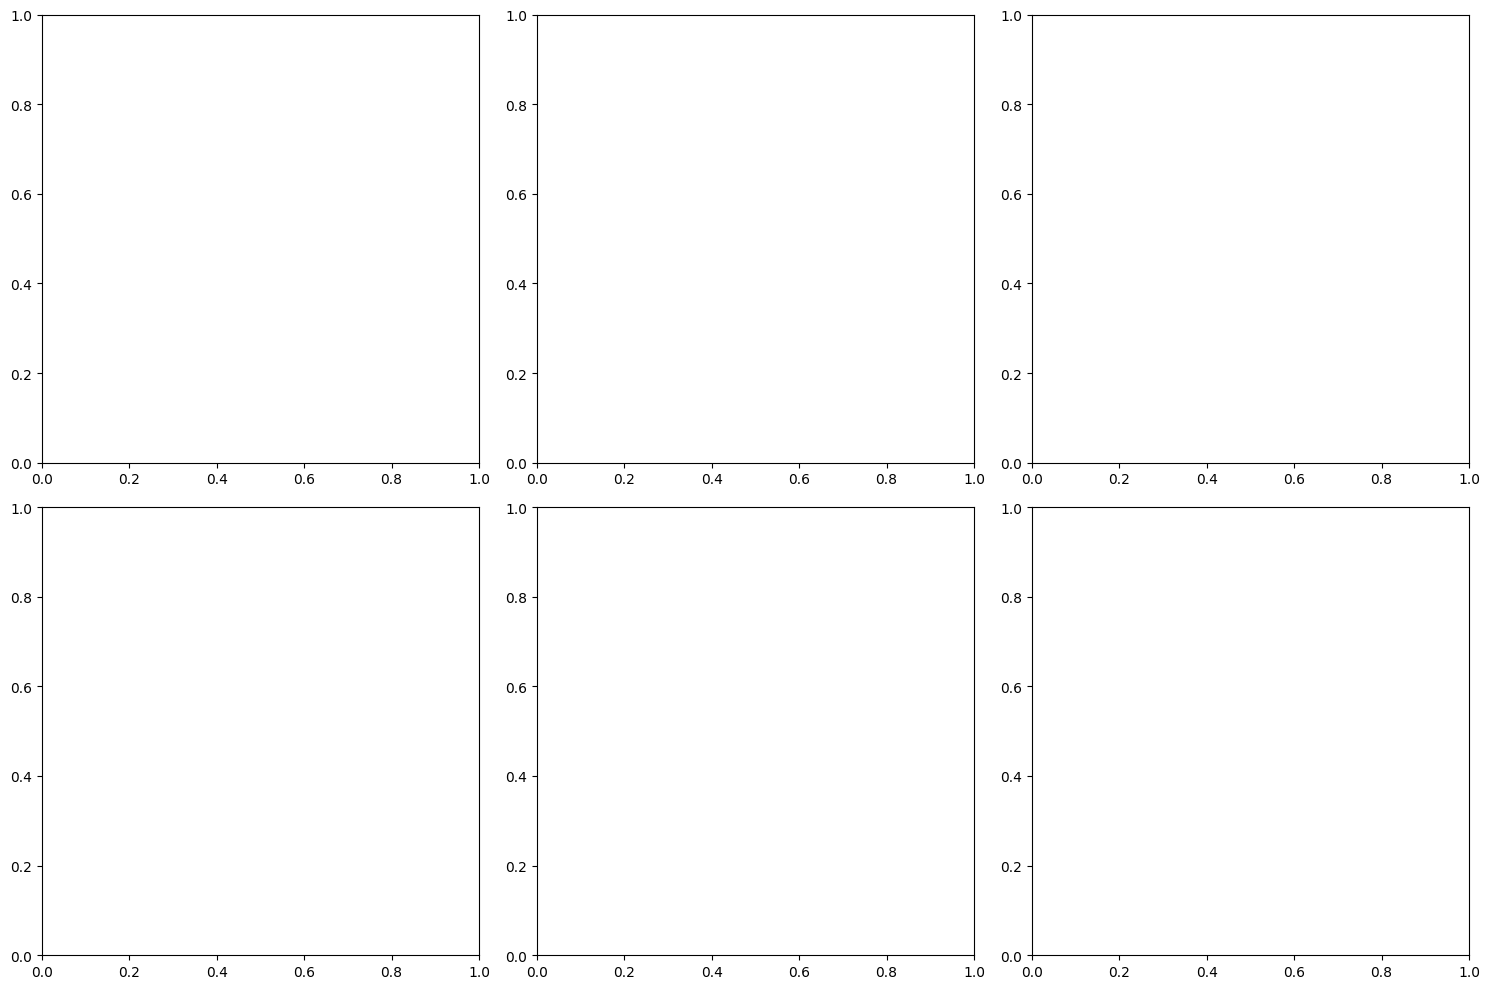

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menampilkan distribusi dalam 2 baris dan 3 kolom
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    if feature in df.columns:  # Memeriksa apakah kolom ada dalam DataFrame
        sns.histplot(df[feature], kde=True, color='skyblue', ax=axes[i])
        axes[i].set_title(f'Histogram of {feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ipywidgets as widgets
from IPython.display import display

# Fungsi untuk plot
def plot_histogram(feature, bin_width):
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], kde=True, bins=np.arange(min(df[feature]), max(df[feature]) + bin_width, bin_width), color='skyblue')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Menampilkan interaktif bin width
for feature in numerical_features:
    if feature in df.columns:  # Memeriksa apakah kolom ada dalam DataFrame
        bin_slider = widgets.FloatSlider(min=0.1, max=1.0, step=0.1, value=0.5, description="Bin Width")
        interactive_plot = widgets.interactive(plot_histogram, feature=widgets.fixed(feature), bin_width=bin_slider)
        display(interactive_plot)


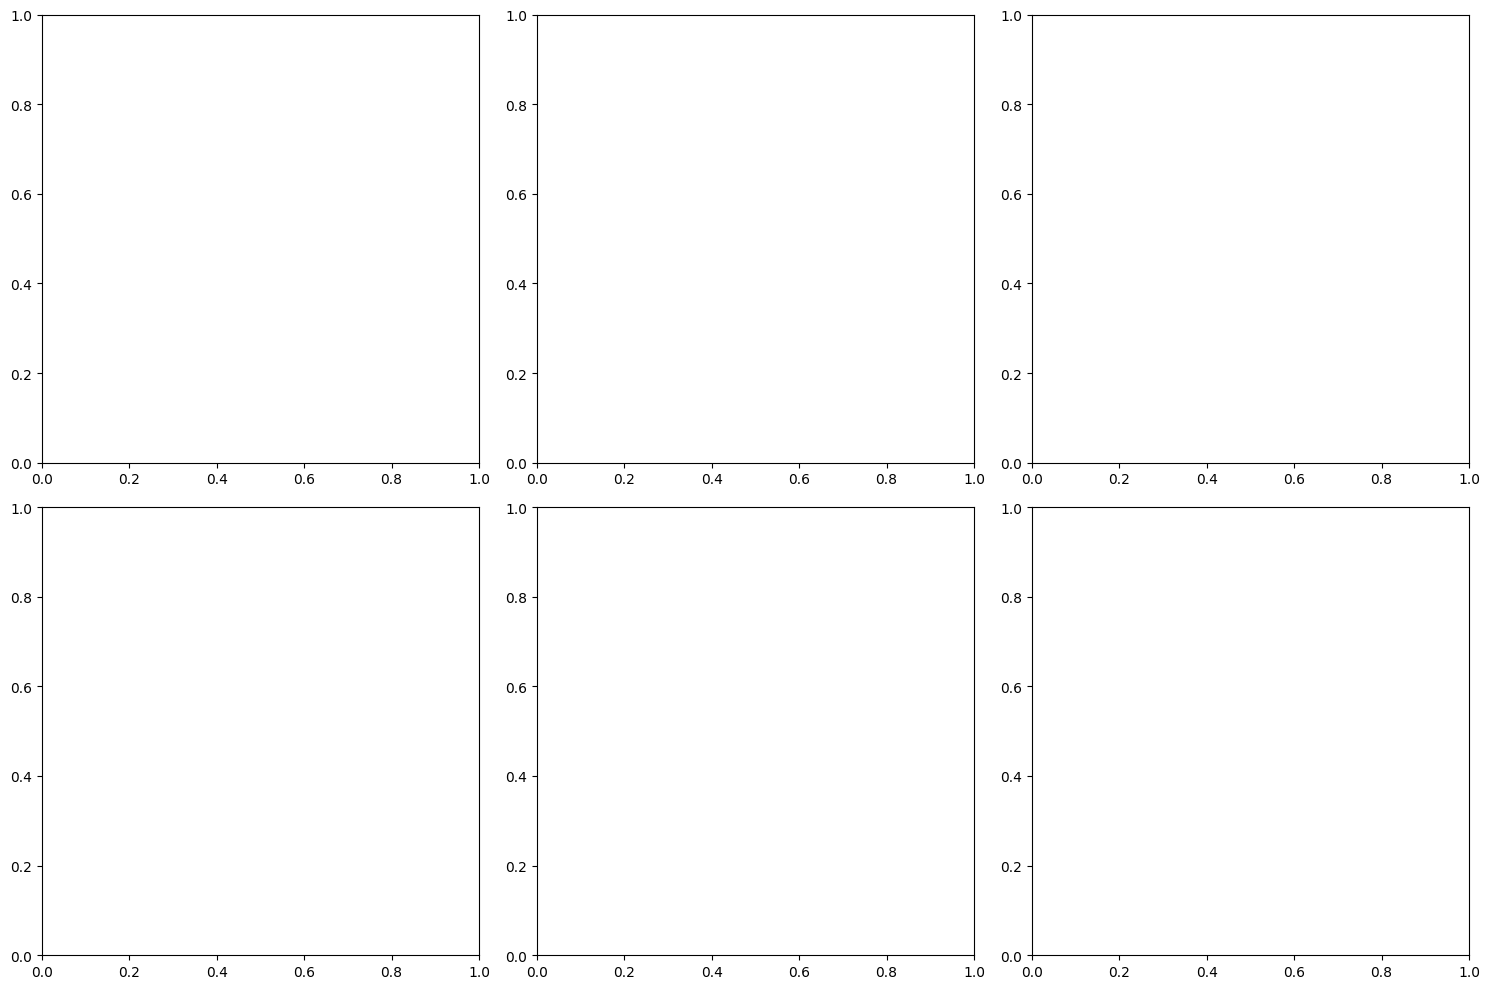

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menampilkan box plot dalam 2 baris dan 3 kolom dengan orientasi horizontal
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    if feature in df.columns:  # Memeriksa apakah kolom ada dalam DataFrame
        sns.boxplot(y=df[feature], ax=axes[i], color='skyblue')
        axes[i].set_title(f'Box Plot of {feature}')
        axes[i].set_xlabel(feature)

plt.tight_layout()
plt.show()
